# **ДЗ1**

**Классический МЛ в NLP**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import zipfile
zip_file = '/content/drive/MyDrive/shoes_dataset/Shoes_Data.csv.zip'  
z = zipfile.ZipFile(zip_file, 'r')
z.extractall('/content')

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Shoes_Data.csv')

In [5]:
df.head(5)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


In [32]:
df.shape #всего в датасете 1230 продуктов, 8 признаков

(1230, 8)

**Задание 1**

In [6]:
descriptions = df['product_description'].tolist()

In [33]:
len(descriptions)

1230

In [182]:
lens = []
for d in descriptions:
  lens.append(len(d))

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

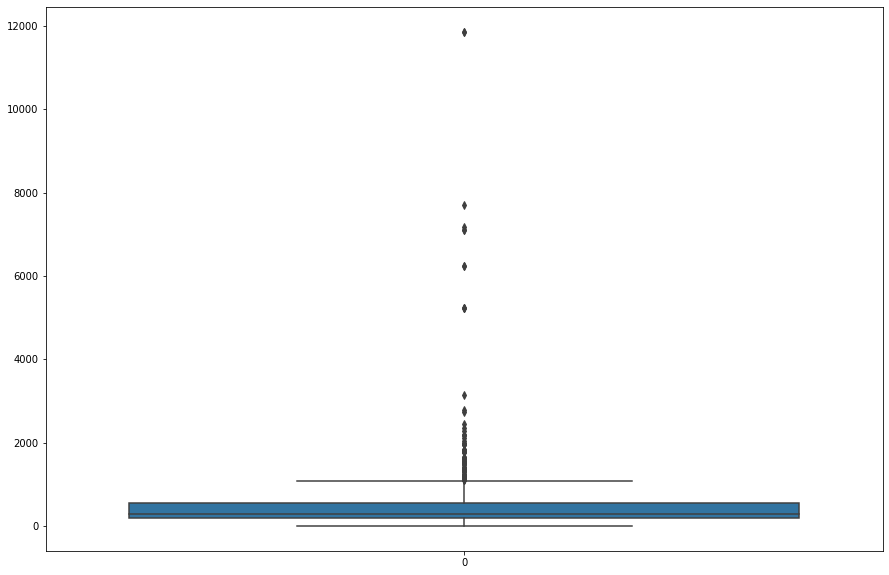

In [9]:
plt.figure(figsize=(15,10)) #длина описаний - среднее значение ниже 1000, есть выбросы - очень длинные описания
sns.boxplot(data=lens)

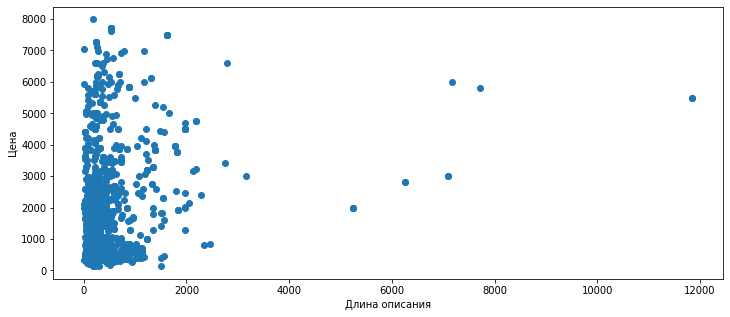

In [190]:
plt.figure(figsize=(12, 5)) #посмотрим на графике зависимость цены от длины отзыва. Большинство описаний содержит небольшое количество слов, поэтому здесь зависимости не видно
plt.scatter(lens, y)
plt.ylabel('Цена')
plt.xlabel('Длина отзыва');

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords
stopwords.words('english')
print(stopwords.words())

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [12]:
import re

Убираем стоп-слова, приводим к нижнему регистру. Для английского языка смысла в лемматизации особо нет. В тексте оставляем только буквы и цифры, чтобы очистить от нежелательных символов

In [34]:
cleaned_texts = []
for d in descriptions:
  res = re.sub(r'[^a-zA-Z\d\s]', u'', d, flags=re.UNICODE)
  res = res.lower()
  d = res.split(' ')
  e = []
  for el in d:
    if el not in stopwords.words():
      e.append(el)
  cleaned_texts.append(e)

In [36]:
cleaned_texts_for_model = []
for text in cleaned_texts:
  text = ' '.join(text)
  cleaned_texts_for_model.append(text)

In [179]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

In [226]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_texts_for_model)

In [227]:
vectorizer = TfidfVectorizer()
X_tf = vectorizer.fit_transform(cleaned_texts_for_model)

In [228]:
price = df['price'].tolist()

In [229]:
y = []
for el in price:
  el = el.replace('₹', '', 1)
  el = float(el)
  y.append(el)

In [230]:
price_for_graph = []
for el in price:
  el = el.replace('₹', '', 1)
  el = float(el)
  price_for_graph.append(el)

In [150]:
from sklearn.model_selection import train_test_split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [232]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y, test_size=0.33, random_state=42)

In [233]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [154]:
model = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [155]:
classifier =  GridSearchCV(model, params)

Обучим на BOW

In [156]:
classifier.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [157]:
classifier.best_estimator_

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [158]:
classifier.best_score_

-0.4004175883382187

In [159]:
mean_absolute_error(y_test, classifier.predict(X_test))

1022.3449195715466

Обучим на tfidf

In [160]:
classifier.fit(X_train_tf, y_train_tf)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [161]:
classifier.best_estimator_

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [162]:
classifier.best_score_

0.4271328143988485

In [163]:
mean_absolute_error(y_test_tf, classifier.predict(X_test_tf))

776.413249719488

Обучим случайный лес сначала на BOW, затем на tfidf

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [168]:
model2 = RandomForestRegressor()
params = {'max_depth': [10, 20, 30],
 'min_samples_leaf': [1, 2, 4]}

In [169]:
classifier2 = GridSearchCV(model2, params)

In [170]:
classifier2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [171]:
classifier2.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [172]:
classifier2.best_score_

0.6564903206013678

In [173]:
mean_absolute_error(y_test, classifier2.predict(X_test))

590.211862208541

In [174]:
classifier2.fit(X_train_tf, y_train_tf)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [175]:
classifier2.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [176]:
classifier2.best_score_

0.650619268149818

In [177]:
mean_absolute_error(y_test_tf, classifier2.predict(X_test_tf))

598.8967211652434

**Задание 2**

In [191]:
reviews = df['reviews'].tolist()

In [192]:
sep_reviews = []
for r in reviews:
  r = r.split('||')
  sep_reviews.extend(r)

In [193]:
reviews_ratings = df['reviews_rating'].tolist()

In [194]:
sep_ratings = []
for r in reviews_ratings:
    r = r.split('||')
    ratings = []
    for el in r:
        el = el.split(' ')
        filtered_el = list(filter(None, el))
        ratings.append(int(filtered_el[0].split('.')[0]))
    sep_ratings.extend(ratings)

In [195]:
lens = []
for s in sep_reviews:
  lens.append(len(s))

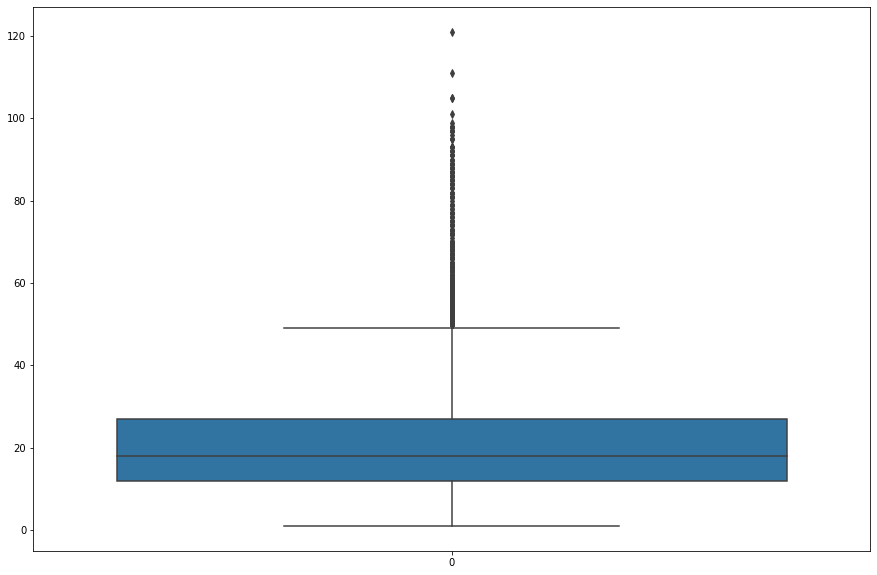

In [120]:
plt.figure(figsize=(15,10)) #длина описаний - в целом, здесь короткие описания, так как это уже отзывы пользователей
sns.boxplot(data=lens)

In [196]:
cleaned_reviews = []
for d in sep_reviews:
  res = re.sub(r'[^a-zA-Z\d\s]', u'', d, flags=re.UNICODE)
  res = res.lower()
  d = res.split(' ')
  e = []
  for el in d:
    if el not in stopwords.words():
      e.append(el)
  cleaned_reviews.append(e)

In [197]:
cleaned_reviews_for_model = []
for text in cleaned_reviews:
  text = ' '.join(text)
  cleaned_reviews_for_model.append(text)

In [202]:
X = cleaned_reviews_for_model
y = sep_ratings

In [203]:
vectorizer = TfidfVectorizer()
X_tf = vectorizer.fit_transform(X)

In [204]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [205]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y, test_size=0.33, random_state=42)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Для задачи классификации сначала обучим логистическую регрессию: на BOW и на 
tfidf

In [127]:
model3 = LogisticRegression()
params3 = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [128]:
classifier3 = GridSearchCV(model3, params3)

In [130]:
classifier3.fit(X_train_tf, y_train_tf)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [131]:
classifier3.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
classifier3.best_score_

0.6205971171717513

In [207]:
mean_absolute_error(y_test_tf, classifier3.predict(X_test_tf))

0.6772132643748099

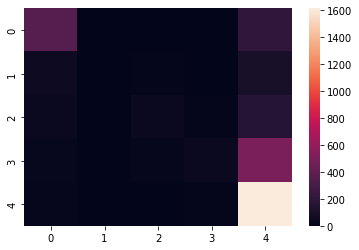

In [224]:
sns.heatmap(confusion_matrix(y_test_tf, classifier3.predict(X_test_tf))) #анализ предсказаний с помощью heatmap (для последнего пункта заданий)

In [210]:
classifier3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [211]:
classifier3.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
classifier3.best_score_

0.6246456547007395

In [213]:
mean_absolute_error(y_test, classifier3.predict(X_test))

0.6832978399756617

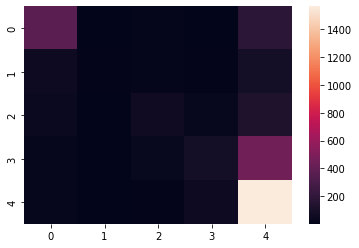

In [223]:
sns.heatmap(confusion_matrix(y_test, classifier3.predict(X_test))) #анализ предсказаний с помощью heatmap (для последнего пункта заданий)

Теперь обучим knn

In [133]:
model4 = KNeighborsClassifier()
k_range = list(range(1, 31))
params4 = dict(n_neighbors=k_range)

In [137]:
сlassifier4 = GridSearchCV(model4, params4)

In [138]:
сlassifier4.fit(X_train_tf, y_train_tf)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [141]:
сlassifier4.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [143]:
сlassifier4.best_score_

0.5528393106817378

In [209]:
mean_absolute_error(y_test_tf, сlassifier4.predict(X_test_tf))

0.8670520231213873

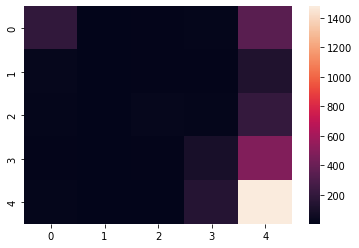

In [221]:
sns.heatmap(confusion_matrix(y_test_tf, сlassifier4.predict(X_test_tf))) #анализ предсказаний с помощью heatmap (для последнего пункта заданий)

In [214]:
сlassifier4.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [215]:
сlassifier4.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [216]:
сlassifier4.best_score_

0.5685793058526917

In [217]:
mean_absolute_error(y_test, сlassifier4.predict(X_test))

0.836629145117128

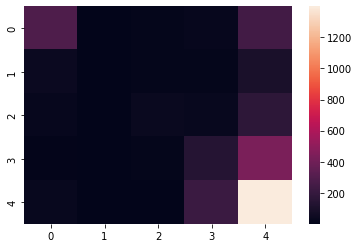

In [220]:
sns.heatmap(confusion_matrix(y_test, сlassifier4.predict(X_test))) #анализ предсказаний с помощью heatmap (для последнего пункта заданий)

Анализ результатов:


1.   В задаче регрессии линейная регрессия с векторами BOW дала худшее качество, чем с векторами tfidf. Ошибка при обучении Random forest на tfidf наоборот была выше, чем на BOW. Лучшая модель в этой задаче - случайный лес с подобранными гиперпараметрами, обученный на BOW.
2.   В задаче классификации при обучении логистической регрессии на tfidf векторах ошибка была немного ниже, чем на BOW. Knn дал немного более низкую ошибку при обучении на BOW. В этой задаче лучшей была логистическая регрессия с подобранными гиперпараметрами, обученная на tfidf векторах.

В целом логично, что вектора tfidf почти всегда давали лучшие результаты, так как учитывают не просто слова, а их частотность и значимость для корпуса текстов.

Думаю, качество можно было бы улучшить, обучая модели на биграммах, так как разделение слов может привести к потере общего смысла. Тогда не нужно бы было и убирать стоп-слова, потому что, например, предлог not в сочетании с not good дает плохой отзыв, а если бы этот предлог убрали - отзыв бы был отнесен к хорошему. 

